 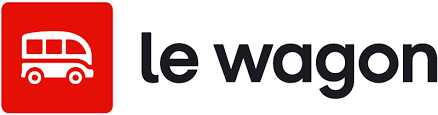

# Introduction to DataFrame

## Librairies in Python

Python libraries are a collection of functions. 

You have to use the `import` operator to use them. Below we import the Pandas library for data analysis.

In [ ]:
import pandas as pd # pd alias is a convention

Now, we can access any object or functions from pandas library by using the pd alias

In [ ]:
pd.to_datetime() # we access to_datetime() pandas function

##Create and Save a DataFrame

### From a csv/excel file excel

Download [introduction_dataframe_data.csv](https://drive.google.com/file/d/1FDbTULmd73kvTr1fKJQ0J-4WSVlekrzi/view?usp=sharing) and import it to Google colaboratory.

In [ ]:
df = pd.read_csv("introduction_dataframe_data.csv")
# df = pd.read_excel()

df

,date,store_id,item_id,price,quantity
0,20190101,23,67,100,2
1,20190101,11,87,20,3
2,20190103,11,56,50,1
3,20190105,13,87,20,5
4,20190107,13,56,50,2
5,20190111,23,56,50,3


In [ ]:
df.columns

Index(['date', 'store_id', 'item_id', 'price', 'quantity'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
df.shape

(6, 5)

### From a dictionnary

In [ ]:
df = pd.DataFrame({
    "date": ["20190101", "20190101", "20190103", "20190105", "20190107", "20190111"],
    "store_id": [23, 11, 11, 13, 13, 23],
    "item_id": [67, 87, 56, 87, 56, 56],
    "price": [100, 20, 50, 20, 50, 50],
    "quantity": [2, 3, 1, 5, 2, 3]
})
df

,date,store_id,item_id,price,quantity
0,20190101,23,67,100,2
1,20190101,11,87,20,3
2,20190103,11,56,50,1
3,20190105,13,87,20,5
4,20190107,13,56,50,2
5,20190111,23,56,50,3


### From a list of list

In [ ]:
df = pd.DataFrame([['20190101', 23, 67, 100, 2],
       ['20190101', 11, 87, 20, 3],
       ['20190103', 11, 56, 50, 1],
       ['20190105', 13, 87, 20, 5],
       ['20190107', 13, 56, 50, 2],
       ['20190111', 23, 56, 50, 3]], columns = ["date", "store_id", "item_id", "price", "quantity"])
df

,date,store_id,item_id,price,quantity
0,20190101,23,67,100,2
1,20190101,11,87,20,3
2,20190103,11,56,50,1
3,20190105,13,87,20,5
4,20190107,13,56,50,2
5,20190111,23,56,50,3


### Save a DataFrame on hard disk

In [ ]:
df.to_csv("introduction_dataframe_data.csv", index=False) #index=True if you want to save the DataFrame index

## Selecting with Pandas

Select a column

In [ ]:
df["store_id"]

0    23
1    11
2    11
3    13
4    13
5    23
Name: store_id, dtype: int64

In [ ]:
print(type(df["store_id"]))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(df[["store_id"]])) # double brackets [] gives a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.store_id # only works if column has no space in its name

0    23
1    11
2    11
3    13
4    13
5    23
Name: store_id, dtype: int64

Select **multiple columns**

In [ ]:
columns_to_keep = ["store_id", "item_id", "quantity"]
df[columns_to_keep]

# or without variable df[["store_id", "item_id", "quantity"]]

,store_id,item_id,quantity
0,23,67,2
1,11,87,3
2,11,56,1
3,13,87,5
4,13,56,2
5,23,56,3


### loc & iloc

**loc** is to select the desired rows and columns using the index and column names

In [ ]:
df.loc[1:3, ["store_id", "item_id"]]

,store_id,item_id
1,11,87
2,11,56
3,13,87


In [ ]:
df.loc[:, ["store_id", "item_id"]]

,store_id,item_id
0,23,67
1,11,87
2,11,56
3,13,87
4,13,56
5,23,56


`iloc` also selects the desired rows and columns **but using the indices instead**.

In [ ]:
df.iloc[1:4, 1:3]

,store_id,item_id
1,11,87
2,11,56
3,13,87


### Masking

When we want to filter the rows of a DataFrame, we use a mask.

In [ ]:
mask_store_id_23 = (df["store_id"] == 23)

In [ ]:
mask_store_id_23

0     True
1    False
2    False
3    False
4    False
5     True
Name: store_id, dtype: bool

Then we apply this mask to keep only the lines equal to True

In [ ]:
df_stores_id_23 = df[mask_store_id_23]
df_stores_id_23

,date,store_id,item_id,price,quantity
0,20190101,23,67,100,2
5,20190111,23,56,50,3


Multiple conditions can be combined in a mask

In [ ]:
mask_store_id_23_item_id_56 = (df["store_id"] == 23) & (df["item_id"] == 56)
df[mask_store_id_23_item_id_56]

,date,store_id,item_id,price,quantity
5,20190111,23,56,50,3


& means "and", | means "or"

Use brackets () to apply logic order

## Create new columns

Similar to dictionaries, a new column is created by referring to it even if it does not yet exist!

In [ ]:
df["my_1_column"] = 1

In [ ]:
df

,date,store_id,item_id,price,quantity,my_1_column
0,20190101,23,67,100,2,1
1,20190101,11,87,20,3,1
2,20190103,11,56,50,1,1
3,20190105,13,87,20,5,1
4,20190107,13,56,50,2,1
5,20190111,23,56,50,3,1


### Arithmetic operations

In [ ]:
df["total_spend"] = df["quantity"] * df["price"]
df

,date,store_id,item_id,price,quantity,my_1_column,total_spend
0,20190101,23,67,100,2,1,200
1,20190101,11,87,20,3,1,60
2,20190103,11,56,50,1,1,50
3,20190105,13,87,20,5,1,100
4,20190107,13,56,50,2,1,100
5,20190111,23,56,50,3,1,150


### Lambda functions

Not everything can be written with simple operations between columns, for this we need lambda functions.

To illustrate a lambda function to multiply the quantity column by 2:

In [ ]:
df["quantity"].apply(lambda x: x*2) # create a new set of values without re-assigning

0     4
1     6
2     2
3    10
4     4
5     6
Name: quantity, dtype: int64

It can also be applied to several columns to create a new column:

In [ ]:
df["store_item"] = df[["store_id", "item_id"]].apply(lambda row: str(row["store_id"]) + "-" + str(row["item_id"]), 
                                                     axis=1)
df

,date,store_id,item_id,price,quantity,my_1_column,total_spend,store_item
0,20190101,23,67,100,2,1,200,23-67
1,20190101,11,87,20,3,1,60,11-87
2,20190103,11,56,50,1,1,50,11-56
3,20190105,13,87,20,5,1,100,13-87
4,20190107,13,56,50,2,1,100,13-56
5,20190111,23,56,50,3,1,150,23-56


As many possibilities as you want / need, it's code !

### With classic Python

In [ ]:
col = []

for store_id, item_id in df[["store_id", "item_id"]].values:
    col.append(str(store_id) + "-" + str(item_id))

df["store_item"] = col
df

,date,store_id,item_id,price,quantity,my_1_column,total_spend,store_item
0,20190101,23,67,100,2,1,200,23-67
1,20190101,11,87,20,3,1,60,11-87
2,20190103,11,56,50,1,1,50,11-56
3,20190105,13,87,20,5,1,100,13-87
4,20190107,13,56,50,2,1,100,13-56
5,20190111,23,56,50,3,1,150,23-56


## Agregation operations

Simple calculation of statistics:

- sum: to calculate the sum
- max: to calculate the maximum
- min: to calculate the minimum
- median: to calculate the median
- mode: to calculate the most present value
- nunique: to calculate the number of unique values

In [ ]:
df["quantity"].sum()

16

Average price

In [ ]:
df["price"].sum() / df["quantity"].sum()

18.125

Differentiate functions per column

In [ ]:
df.agg({"price": "mean", "quantity": "median"}) 
# agg parameter is a dictionary with the name of the column as the key and the function to be applied as the value

price       48.333333
quantity     2.500000
dtype: float64

### Groupby

Use Groupby to resume info per dimension. In the following example, we calculate the total quantity per store.

In [ ]:
df.groupby(["store_id"])["quantity"].sum() 

store_id
11    4
13    7
23    5
Name: quantity, dtype: int64

Get the average for quantity and price at the same time.

Note, we don't need to use `.agg()` here because it's the same function we want apply.

In [ ]:
df.groupby(["store_id"])["quantity", "price"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,price
store_id,,
11,2.0,35.0
13,3.5,35.0
23,2.5,75.0


You may also want to sort the output, you will need to use the `sort_values` function



In [ ]:
df.groupby(["store_id"])["quantity", "price"].mean().sort_values(by=["quantity"], ascending=[False])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,price
store_id,,
13,3.5,35.0
23,2.5,75.0
11,2.0,35.0


### Pivot table

Pivot tables are very useful in Excel, Pandas also offers the possibility to do it easily

In [ ]:
df

,date,store_id,item_id,price,quantity,my_1_column,total_spend,store_item
0,20190101,23,67,100,2,1,200,23-67
1,20190101,11,87,20,3,1,60,11-87
2,20190103,11,56,50,1,1,50,11-56
3,20190105,13,87,20,5,1,100,13-87
4,20190107,13,56,50,2,1,100,13-56
5,20190111,23,56,50,3,1,150,23-56


In [ ]:
df_pivot = pd.pivot_table(df, values=['quantity'], index=['item_id'], columns=['store_id'], aggfunc=sum)
df_pivot

quantity          
store_id       11   13   23
item_id                    
56            1.0  2.0  3.0
67            NaN  NaN  2.0
87            3.0  5.0  NaN

### Melting

Delete quantity column index and integrate item_id as a column

In [ ]:
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot.reset_index()

In [ ]:
df_pivot

store_id,item_id,11,13,23
0,56,1.0,2.0,3.0
1,67,NaN,NaN,2.0
2,87,3.0,5.0,NaN


Melting let you do the opposite action of pivoting. For example we want to create an extra column with store_ids.

In [ ]:
pd.melt(df_pivot, id_vars=["item_id"], value_vars=[11, 13, 23])

,item_id,store_id,value
0,56,11,1.0
1,67,11,NaN
2,87,11,3.0
3,56,13,2.0
4,67,13,NaN
5,87,13,5.0
6,56,23,3.0
7,67,23,2.0
8,87,23,NaN


## Joins

### Concatenate

In [ ]:
df1 = pd.DataFrame({"id": [100, 101, 102],
                    "first_name": ["paul", "victor", "lucie"], 
                    "last_name": ["oiseau", "blanc", "misa"]})
df1

,id,first_name,last_name
0,100,paul,oiseau
1,101,victor,blanc
2,102,lucie,misa


In [ ]:
df2 = pd.DataFrame({"id": [103, 104, 105],
                    "first_name": ["cécile", "ludivine", "kevin"], 
                    "last_name": ["hevert", "masseau", "leroi"]})
df2

,id,first_name,last_name
0,103,cécile,hevert
1,104,ludivine,masseau
2,105,kevin,leroi


To concatenate two DataFrames, you need to use the `concat` function of pandas, **beware** of the axis parameter, which determines how to concatenate (in rows or columns)

In [ ]:
df_concat = pd.concat([df1, df2], axis=0)
df_concat

,id,first_name,last_name
0,100,paul,oiseau
1,101,victor,blanc
2,102,lucie,misa
0,103,cécile,hevert
1,104,ludivine,masseau
2,105,kevin,leroi


Reordering the names of the indices

In [ ]:
df_concat = df_concat.reset_index(drop=True)
df_concat

,id,first_name,last_name
0,100,paul,oiseau
1,101,victor,blanc
2,102,lucie,misa
3,103,cécile,hevert
4,104,ludivine,masseau
5,105,kevin,leroi


In [ ]:
pd.concat([df1, df2], axis=1) # With opposite axis

,id,first_name,last_name,id,first_name,last_name
0,100,paul,oiseau,103,cécile,hevert
1,101,victor,blanc,104,ludivine,masseau
2,102,lucie,misa,105,kevin,leroi


### join

In [ ]:
df3 = pd.DataFrame({"id": [103, 100, 101, 112],
                    "age": [28, 42, 87, 55]})
df3

,id,age
0,103,28
1,100,42
2,101,87
3,112,55


**Inner join**, keep only the ids common to both DataFrame

In [ ]:
pd.merge(df_concat, df3, on=["id"], how="inner") # you can have multiple columns

,id,first_name,last_name,age
0,100,paul,oiseau,42
1,101,victor,blanc,87
2,103,cécile,hevert,28


**Left join**, keep only the ids of the left DataFrame and we mark the correspondence if there is one!

In [ ]:
pd.merge(df_concat, df3, on=["id"], how="left")

,id,first_name,last_name,age
0,100,paul,oiseau,42.0
1,101,victor,blanc,87.0
2,102,lucie,misa,NaN
3,103,cécile,hevert,28.0
4,104,ludivine,masseau,NaN
5,105,kevin,leroi,NaN


**Outer join**, keep the union of the ids of the left and right DataFrame with correspondence when it is possible

In [ ]:
pd.merge(df_concat, df3, on=["id"], how="outer")

,id,first_name,last_name,age
0,100,paul,oiseau,42.0
1,101,victor,blanc,87.0
2,102,lucie,misa,NaN
3,103,cécile,hevert,28.0
4,104,ludivine,masseau,NaN
5,105,kevin,leroi,NaN
6,112,NaN,NaN,55.0


## Handling dates in Pandas

Let's look at the type of the date column of the sales data

In [ ]:
print(df.loc[0, "date"])
type(df.loc[0, "date"])

20190101


str

You can convert a column to date format using functions already implemented in Python.

In [ ]:
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d') # format depends on how is written your date!

In [ ]:
print(df.loc[0, "date"])
type(df.loc[0, "date"])

2019-01-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

List of the columns and their corresponding types. Date column is now datetime64 format.

In [ ]:
df.dtypes

date           datetime64[ns]
store_id                int64
item_id                 int64
price                   int64
quantity                int64
my_1_column             int64
total_spend             int64
store_item             object
dtype: object

To access to dates attributes, you need to use `.dt` on your date column:

In [ ]:
df["date"].dt.day #.month .year

0     1
1     1
2     3
3     5
4     7
5    11
Name: date, dtype: int64

It is now very easy to create another column containing the year week of the dates

In [ ]:
df["date-year-week"] = df["date"].dt.strftime("%Y-%U")
df

,date,store_id,item_id,price,quantity,my_1_column,total_spend,store_item,date-year-week
0,2019-01-01,23,67,100,2,1,200,23-67,2019-00
1,2019-01-01,11,87,20,3,1,60,11-87,2019-00
2,2019-01-03,11,56,50,1,1,50,11-56,2019-00
3,2019-01-05,13,87,20,5,1,100,13-87,2019-00
4,2019-01-07,13,56,50,2,1,100,13-56,2019-01
5,2019-01-11,23,56,50,3,1,150,23-56,2019-01


You have plenty functions accessible with `.dt`, you can find them [on this webpage](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html).

# Let's code !